# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [116]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [117]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [118]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [119]:
# 2. Get the total drivers for each city type
driver_count_by_type = city_data_df.groupby(['type']).sum()['driver_count']
driver_count_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [120]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [121]:
#  4. Get the average fare per ride for each city type. 
average_fare_by_type = total_fares_by_type / total_rides_by_type
average_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [122]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares_by_type / driver_count_by_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [123]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_by_type,
                                 "Total Drivers": driver_count_by_type,
                                 "Total Fares": total_fares_by_type,
                                 "Average Fare per Ride": average_fare_by_type,
                                 "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [124]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [125]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [126]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [127]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]
fares_by_date

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [128]:
## 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date = fares_by_date.reset_index()
fares_by_date

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [136]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_pivot = fares_by_date.pivot(index='date', columns='type', values='fare')
fares_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [130]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
loc_fares_pivot = fares_pivot.loc['1/1/2019':'4/29/2019']
loc_fares_pivot.head(20)

# # new_pyber_summary_df = 

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [131]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
loc_fares_pivot.index = pd.to_datetime(loc_fares_pivot.index)

In [132]:
# 7. Check that the datatype for the index is datetime using df.info()
loc_fares_pivot.info

<bound method DataFrame.info of type                 Rural  Suburban  Urban
date                                       
2019-01-01 00:08:00    NaN       NaN  37.91
2019-01-01 00:46:00    NaN     47.74    NaN
2019-01-01 12:32:00    NaN     25.56    NaN
2019-01-01 14:40:00    NaN       NaN   5.42
2019-01-01 14:42:00    NaN       NaN  12.31
...                    ...       ...    ...
2019-04-28 04:34:00    NaN       NaN  40.46
2019-04-28 08:15:00    NaN       NaN  22.86
2019-04-28 09:03:00    NaN       NaN  15.00
2019-04-28 09:10:00    NaN       NaN   5.73
2019-04-28 09:25:00    NaN       NaN  37.35

[2057 rows x 3 columns]>

In [133]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
loc_fares_by_date = loc_fares_pivot.resample('W').sum()
loc_fares_by_date

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


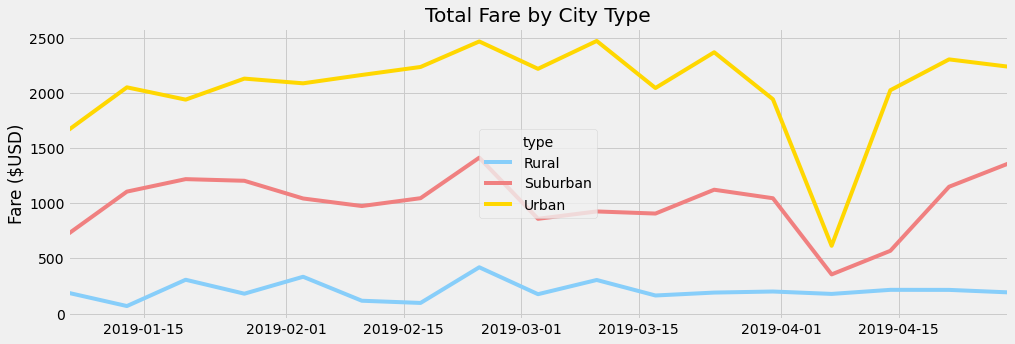

In [135]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Create and plot chart.
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(loc_fares_by_date['Rural'], c="lightskyblue", label="Rural")
ax.plot(loc_fares_by_date['Suburban'], c="lightcoral", label="Suburban")
ax.plot(loc_fares_by_date['Urban'], c="gold", label="Urban")

# Annotate chart
ax.set_title("Total Fare by City Type")
ax.set_ylabel('Fare ($USD)')
ax.set_xlim('2019-01-06', '2019-04-28')

# Set x tickers to months
# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%m')
# ax.xaxis.set_major_formatter(myFmt)
months = ["Jan 2019", "Feb", "Mar", "Apr"]
#dates = ['2019-01-01':'2019-04-28']
#plt.xticks(np.arange(0, 4, step=1), months)


# Create legend.
ax.legend(loc='center', title="type")
plt.show()

# Save chart in Analysis folder.
#plt.savefig("Analysis/Fig8.png")